## Test the ResNet Model to see if its garbage or not

In [109]:
import torch
import torchvision
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image
from load_dataset import load_dataset_pytorch
from torchvision import transforms

os.chdir('/Users/joeholt/Documents/College Local/Current/CS 639/proj/test')
plt.ion()   # interactive mode

In [63]:
model = torch.load('resenet-v0-25ep.pth')
model.eval();

### Tests on Training Data

In [64]:
# load test image
dataloaders, class_names, dataset_sizes = load_dataset_pytorch()
train_loader = dataloaders['train']
test_loader = dataloaders['val']

In [65]:
print("Classes:", class_names)
print("Sizes:", dataset_sizes)

Classes: ['c', 'down', 'fist', 'index', 'l', 'ok', 'palm', 'thumb']
Sizes: {'train': 8000, 'val': 80}


In [100]:
def predict(Xi):
    result = model(Xi)
    return torch.max(result, 1).indices

In [67]:
def accuracy_by_class(loader, max_items=None):
    totals_per_class  = [0 for _ in range(len(class_names))]
    correct_per_class = [0 for _ in range(len(class_names))]
    # go over entire train set
    for Xi, yi in loader:
        # see if we should stop
        if max_items is not None and max_items < sum(totals_per_class):
            break
        # predict and see if correct
        y_hat = predict(Xi)
        correct = (yi == y_hat).float()
        # update states
        for idx, item in enumerate(yi):
            totals_per_class[item.item()] += 1
            correct_per_class[item.item()] += correct[idx]
    # get totals
    return [correct_per_class[idx] / totals_per_class[idx] for idx in range(len(class_names))], totals_per_class

In [ ]:
acc, totals = accuracy_by_class(train_loader, 1000)

In [68]:
def print_acc(acc, totals):
    weighted = [acc[idx].item() * totals[idx] for idx in range(len(totals))]

    print('Accuracy By Class ({} total items):'.format(sum(totals)))
    for class_idx, acc in enumerate(acc):
        class_name = class_names[class_idx]
        tabs = "\t" if len(class_name) > 2 else "\t\t"
        print("    {}{}({} items): {}".format(class_name, tabs, totals[class_idx], round(acc.item(), 5)))

    print('Overall Accuracy:', round(sum(weighted) / sum(totals), 6))

In [121]:
print_acc(acc, totals)

Accuracy By Class (1004 total items):
    c		(129 items): 0.68217
    down	(141 items): 0.76596
    fist	(120 items): 0.75833
    index	(127 items): 0.86614
    l		(132 items): 0.75
    ok		(109 items): 0.78899
    palm	(128 items): 0.82031
    thumb	(118 items): 0.80508
Overall Accuracy: 0.778884


## Tests on specific training items

In [92]:
Xi, yi = next(iter(train_loader))

torch.Size([4, 3, 224, 224])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


['down', 'ok', 'index', 'c']


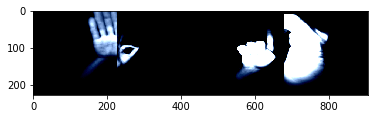

In [95]:
grid = torchvision.utils.make_grid(Xi, nrow=4)
plt.imshow(grid.permute(1, 2, 0))
print([class_names[idx] for idx in yi])

In [101]:
print([class_names[idx] for idx in predict(Xi)])

['down', 'ok', 'index', 'c']


### Tests on input images

In [131]:
img_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [132]:
def cvt_color_gray3(img):
    img_arr = np.array(img)
    img_gray = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
    thump_gray3 = np.zeros_like(img_arr)
    thump_gray3[:,:,0] = img_gray
    thump_gray3[:,:,1] = img_gray
    thump_gray3[:,:,2] = img_gray
    return thump_gray3

In [166]:
def load_and_predict_img(path):
    # open image
    img = np.array(Image.open(path))
    # img_gray = cvt_color_gray3(img)
    # transform image
    img_transformed = img_transform(img).unsqueeze(0);
    # show
    plt.imshow(img_transformed.squeeze(0).permute(1, 2, 0)  )
    # predict
    print('Predicted Gesture:', class_names[predict(img_transformed)])

In [167]:
class_names

['c', 'down', 'fist', 'index', 'l', 'ok', 'palm', 'thumb']

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gesture: c


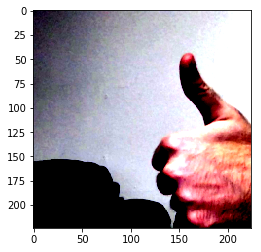

In [168]:
thumb1_path = os.path.join(os.getcwd(), 'data', 'custom_data', 'thumb', 'thumb1_no_mask.jpg')
load_and_predict_img(thumb1_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gesture: c


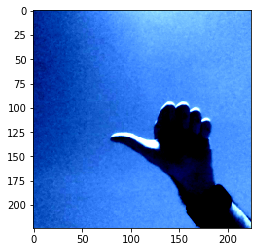

In [169]:
thumb3_path = os.path.join(os.getcwd(), 'data', 'custom_data', 'thumb', 'thumb3.jpg')
load_and_predict_img(thumb3_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gesture: c


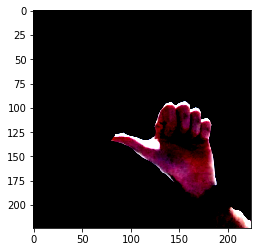

In [170]:
thumb3_path = os.path.join(os.getcwd(), 'data', 'custom_data', 'thumb', 'thumb4.jpg')
load_and_predict_img(thumb3_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gesture: c


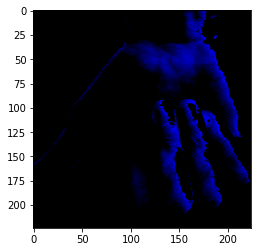

In [171]:
thumb4_path = os.path.join(os.getcwd(), 'data', 'custom_data', 'thumb', 'thumb_masked.jpeg')
load_and_predict_img(thumb4_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gesture: thumb


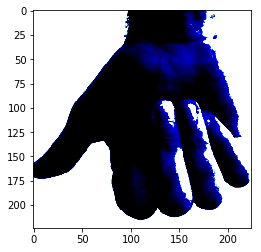

In [172]:
thumb4_path = os.path.join(os.getcwd(), 'data', 'custom_data', 'thumb', 'thumb_masked_white.jpeg')
load_and_predict_img(thumb4_path)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gesture: c


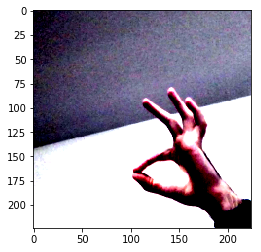

In [173]:
ok1_path = os.path.join(os.getcwd(), 'data', 'custom_data', 'ok', 'ok1_no_mask.jpg')
load_and_predict_img(ok1_path)

## Test with images w table backdrop

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gesture: thumb


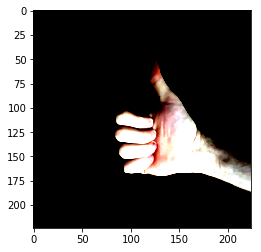

In [174]:
table_thumb = os.path.join(os.getcwd(), 'data', 'custom_data', 'table', 'thumb_table.jpg')
load_and_predict_img(table_thumb)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gesture: c


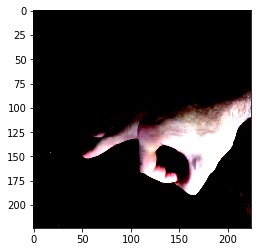

In [175]:
ok_table = os.path.join(os.getcwd(), 'data', 'custom_data', 'table', 'ok_table.jpg')
load_and_predict_img(ok_table)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gesture: index


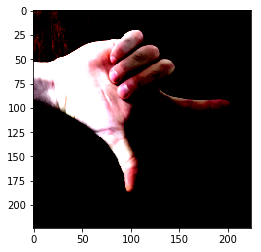

In [176]:
l_table = os.path.join(os.getcwd(), 'data', 'custom_data', 'table', 'l_table.jpg')
load_and_predict_img(l_table)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gesture: index


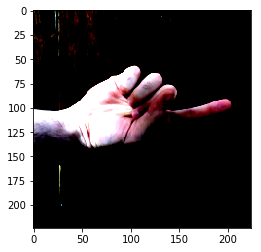

In [177]:
index_table = os.path.join(os.getcwd(), 'data', 'custom_data', 'table', 'index_table.jpg')
load_and_predict_img(index_table)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gesture: index


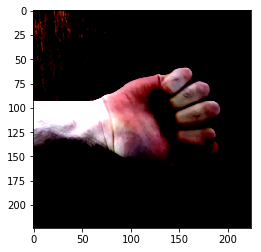

In [178]:
fist_table = os.path.join(os.getcwd(), 'data', 'custom_data', 'table', 'fist_table.jpg')
load_and_predict_img(fist_table)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Predicted Gesture: thumb


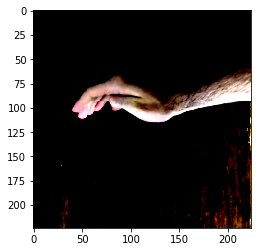

In [179]:
c_table = os.path.join(os.getcwd(), 'data', 'custom_data', 'table', 'c_table.jpg')
load_and_predict_img(c_table)

## image test

In [190]:
import cv2

In [191]:
cap = cv2.VideoCapture(0)

In [192]:
cap.release()

In [193]:
img_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [194]:
def read_img():
    ret, frame = cap.read()
    plt.imshow(frame) 
    return frame

In [195]:
def predict_img():
    classes = ['c', 'down', 'fist', 'index', 'l', 'ok', 'palm', 'thumb']
    img = read_img()
    img_tensor = torch.from_numpy(img).float()
    img_transformed = img_transform(img_tensor).unsqueeze(0);
    print('Predicted Gesture:', classes[predict(img_transformed)])

TypeError: Image data cannot be converted to float

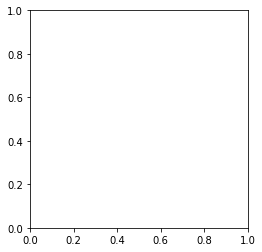

In [196]:
predict_img()